In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset = pd.read_csv('xrp-usd-max.csv')
#training_set = dataset_train.iloc[:, 1:2].values #numpy array

In [6]:
!ls

bitcoin-2.ipynb		       fconsumer_StockPrice.ipynb
bitCoin4AprilToNext57Days.png  googleStockPrice.ipynb
bitcoin_price.ipynb	       Google_Stock_Price_Test.csv
btc-usd-max.csv		       Google_Stock_Price_Train.csv
fconsumer2010To26May2018.csv   ripple-1.ipynb
fconsumer-2-Copy1.ipynb        Untitled.ipynb
fconsumer-2.ipynb	       xrp-usd-max.csv
fconsumerStock


In [7]:
dataset.shape

(1760, 4)

### to predict last 60 days price, hence will make a break for 1700 in training and 60 in test set

In [8]:
training_set = dataset[0:dataset.shape[0]-60]
training_set = training_set.iloc[:, 1:2].values

test_set = dataset[dataset.shape[0]-60:dataset.shape[0]]
test_set = test_set.iloc[:, 1:2].values

## for sigmoid function, normalization is always helpful

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### creating timestep of arrays with 60 day each
##### still to check, why it it 60

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/home/qwerty/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
# Initialising the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation

#units is the number of neurons in the layer
#since the o/p of this layer will be feeded to the next layer, hence return_sequence is True
#input shape is the same for the reshape
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

#20 percent dropping out
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#input_shape is not needed here

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Fitting the RNN to the Training set

#number of epochs is an experimental feature.

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1640/1640 [==============================] - 15s 9ms/step - loss: 0.0063
Epoch 2/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0027
Epoch 3/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0023
Epoch 4/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0016
Epoch 5/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0014
Epoch 6/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0016
Epoch 7/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0013
Epoch 8/100
1640/1640 [==============================] - ETA: 0s - loss: 0.001 - 12s 8ms/step - loss: 0.0012
Epoch 9/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0015
Epoch 10/100
1640/1640 [==============================] - 12s 7ms/step - loss: 0.0014
Epoch 11/100
1640/1640 [==============================] - 12s 7ms/step - loss: 9.6630e-04
Epoch 12/100
1640/1640 [===========

1640/1640 [==============================] - 12s 8ms/step - loss: 4.4952e-04
Epoch 93/100
1640/1640 [==============================] - 13s 8ms/step - loss: 3.6316e-04
Epoch 94/100
1640/1640 [==============================] - 13s 8ms/step - loss: 4.2875e-04
Epoch 95/100
1640/1640 [==============================] - 12s 8ms/step - loss: 4.1750e-04
Epoch 96/100
1640/1640 [==============================] - 12s 8ms/step - loss: 4.8984e-04
Epoch 97/100
1640/1640 [==============================] - 13s 8ms/step - loss: 3.9489e-04
Epoch 98/100
1640/1640 [==============================] - 12s 8ms/step - loss: 5.2801e-04
Epoch 99/100
1640/1640 [==============================] - 12s 8ms/step - loss: 4.8928e-04
Epoch 100/100
1640/1640 [==============================] - 13s 8ms/step - loss: 6.4430e-04


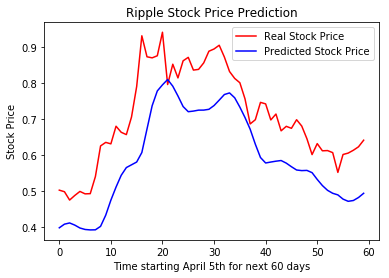

In [19]:
real_stock_price = test_set

inputs = dataset[len(dataset) - len(test_set) - 60:].iloc[:,1:2].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+test_set.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Ripple Stock Price Prediction')
plt.xlabel('Time starting April 5th for next 60 days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [17]:
dataset.iloc[1700]

snapped_at      2018-04-05 00:00:00 UTC
price                          0.502687
market_cap                  1.96523e+10
total_volume                4.19147e+08
Name: 1700, dtype: object